# 1. Введение

>Теперь, когда вы знаете основные классы задач машинного обучения, настало время перейти к __предварительной обработке (препроцессингу, preprocessing) данных__.

В этом модуле мы повторим:

* какие способы представления данных существуют;
* почему к разным представлениям данных нужны разные подходы;
* как происходит кодирование признаков;
* какие способы заполнения пропусков в данных существуют.

# 2. Способы представления данных

При этом выделяют:

* текстовые признаки (object);
* числовые признаки (int64 и float64);
* признаки, обозначающие дату и время/широту и долготу (представляются в числовом формате);
* категориальные признаки, которые могут иметь любой из трёх типов данных и обозначают принадлежность объекта к какому-то классу/категории;
* бинарные признаки, которые являются подвидом категориальных признаков и обозначают принадлежность к одному из двух классов/категорий.



In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/SkillFactory/Machine Learning/ML-6. Отбор и селекция признаков/data_ford_price.xlsx')
data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


In [5]:
data['lat'].describe()

count    7017.000000
mean       39.550144
std         5.745409
min        -2.508807
25%        35.661076
50%        40.335245
75%        43.582100
max        77.617682
Name: lat, dtype: float64

<Axes: >

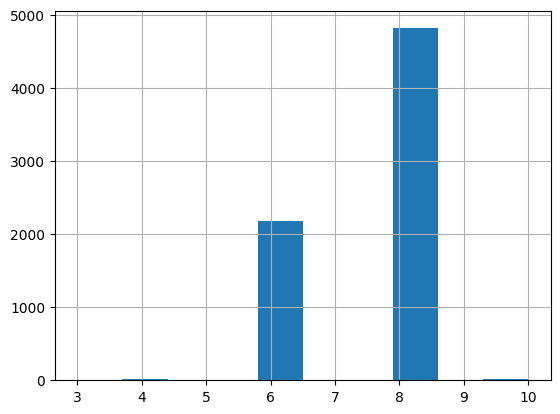

In [6]:
data['cylinders'].hist()

In [7]:
data['title_status'].value_counts(True)

title_status
clean      0.948696
rebuilt    0.021519
lien       0.020522
salvage    0.008408
missing    0.000855
Name: proportion, dtype: float64

# 3. Кодирование признаков

In [8]:
from sklearn.linear_model import LinearRegression
y = data['price']
X = data.drop(columns='price')

Попробуем применить линейную регрессию на «сырых» данных:



In [9]:
lr = LinearRegression()
lr.fit(X, y)

ValueError: could not convert string to float: 'clean'

Мы получим ошибку с комментарием о том, что не удалось превратить строковое значение в число с плавающей точкой (float)

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/8be15badcefe262082f2ba923930636a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-3_2.png)



ТИП КОДИРОВКИ | КЛАСС БИБЛИОТЕКИ SKLEARN

Порядковое кодирование	| LabelEncoder

Двоичное кодирование	| LabelBinarizer

Однократное кодирование	| OneHotEncoder

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/b456ce89c7ba9b7599266ff9b61497ca/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-3_4.png)

Из предыдущих модулей мы знаем, что при решении задач машинного обучения данные разбираются на обучающую (train) и валидационную (validation) выборки (последняя также может быть тестовой (test) выборкой). По аналогии подгонка кодировщика происходит на обучающей выборке, а трансформация — на обучающей и на тестовой.

In [11]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

education = ["нет", "начальное", "среднее", "BSc", "MSc", "начальное", "PhD"]

lb.fit(education)

print("categories: ", lb.classes_)

lb.transform(["нет", "MSc"])

categories:  ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

У класса $LabelBinarizer$, как и у двух остальных, есть атрибут $classes\_$, который выводит список уникальных значений признака

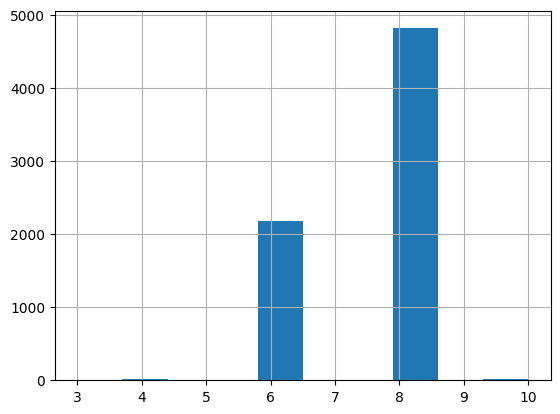

In [13]:
data['cylinders'].hist();

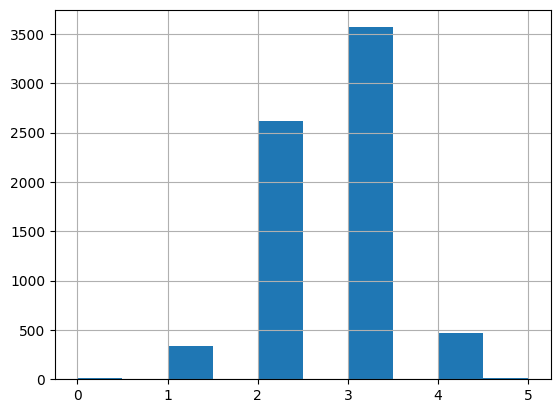

In [14]:
data['condition'].hist();

Важно производить кодирование номинальных признаков, даже если они уже представлены в числовом формате, так как, в отличие от порядковых признаков, категории номинальных являются независимыми. В случае порядкового кодирования таких признаков мы вносим искусственные закономерности в данные (например, чем больше числовой код цилиндров, тем лучше, хотя это необязательно так).

In [16]:
columns_to_change = ['cylinders', 'title_status', 'transmission', \
                     'drive', 'size']
for column in columns_to_change:
  print('Число уникальных значений признака {}: '.format(column), data[column].nunique())

Число уникальных значений признака cylinders:  6
Число уникальных значений признака title_status:  5
Число уникальных значений признака transmission:  3
Число уникальных значений признака drive:  3
Число уникальных значений признака size:  4


Итак, нам подходит однократное кодирование. Применим его к выбранным столбцам. Так как у нас нет отдельной тестовой выборки, то мы используем только один метод — fit_transform(). В качестве аргумента передаём таблицу с выбранными для преобразования признаками.

С помощью метода get_feature_names_out() получим список новых названий колонок:



In [18]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_one_hot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()

# запишем полученные названия новых колонок в отдельную переменную
columns_names = one_hot_encoder.get_feature_names_out(columns_to_change)

print(columns_names)


['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


Напомним, что у библиотеки pandas есть дефолтный метод get_dummies() для получения однократного кодирования признаков. Однако OneHotEncoder способен принимать на вход как таблицы, так и numpy-массивы.

In [36]:
one_hot_encoder = OneHotEncoder()

# Закодируйте столбцы из списка columns_to_change.
data_one_hot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()

# Преобразуйте полученный массив закодированных данных в формат DataFrame, явно указав имена колонок.
data_one_hot = pd.DataFrame(data_one_hot, index=data.index, columns=columns_names)

# Соедините новую таблицу с исходной.
data_preprocessed = pd.concat([data, data_one_hot], axis=1)

# Удалите закодированные столбцы columns_to_change из полученной таблицы.
data_preprocessed = data_preprocessed.drop(columns = columns_to_change, axis=1)

# Выведите на экран форму полученной таблицы.
print('Размерность данных составляет {}'.format(data_preprocessed.shape))

Размерность данных составляет (7017, 30)


#  4. Обработка пропусков и выбросов

## РАБОТА С ПРОПУСКАМИ

Как вы знаете, помимо типов данных, метод info() показывает и число ненулевых значений признака. Если данное число отлично от длины выборки, то в данных присутствуют пропуски.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


> Метод isnull() является алиасом метода isna(): когда вы используете isnull(), он вызывает isna(). Таким образом, это два одинаковых метода.

In [41]:
data[~data['weather'].isna()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


> Символ ~ (тильда) означает, что мы выбираем все строки датасета data, где не выполняется условие data['weather'].isna(), то есть где нет пропусков в столбце 'weather'.

__Задание 4.2__

Какая доля строк в датасете останется, если убрать пропуски в столбце size? Ответ округлите до двух знаков после точки-разделителя.


In [47]:
round(data[~data['size'].isna()].shape[0] / data.shape[0], 2)

0.78

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/2fdacf4a1011fa5185fcfac03f053983/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-4_2.png)

> Первым делом воспользуемся методом удаления строк с пропусками. Плюс данного метода состоит в том, что модель, обученная с удалением всех пропущенных значений, является надёжной, то есть имеет сравнительно хорошее качество на тесте. Среди минусов — потеря большого количества информации, а также плохое качество работы, если процент отсутствующих значений слишком велик по сравнению с полным набором данных

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [51]:
# Удалим данные с пропусками:
X = X.dropna()
y = y.iloc[X.index]

In [52]:
X.shape[0], y.shape[0]

(5202, 5202)

In [54]:
X_train, X_test, y_train, y_test = \
 train_test_split(X, y, test_size=0.2, random_state=30)

> Следующий блок кода будет повторяться для каждого из методов обработки пропусков.

In [65]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Обучаем энкодер и сразу применяем преобразование к выборке.
# Результат переводим в массив:
X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

columns = one_hot_encoder.get_feature_names_out(columns_to_change)

print(columns[:10])

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt']


In [66]:
X_train_onehot_df = pd.DataFrame(X_train_onehot,
                                 columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot,
                             columns=columns)

Переустановим индексацию в таблицах, применив подряд сразу два метода: reset_index() — для изменения индексов с рандомных на последовательные от 0 до n и drop(['index'], axis = 1) — для удаления образовавшегося столбца 'index'.

In [67]:
X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)

y_train = y_train.reset_index().drop(['index'], axis = 1)
y_test = y_test.reset_index().drop(['index'], axis = 1)

In [70]:
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

X_train_new = X_train_new.drop(columns=columns_to_change, axis=1)
X_test_new = X_test_new.drop(columns=columns_to_change, axis=1)

In [72]:
lr_model = LinearRegression()
# Обучаем модель по МНК:
lr_model.fit(X_train_new, y_train)


# Делаем предсказание для тренировочной выборки:
y_train_predict = lr_model.predict(X_train_new)
# Делаем предсказание для тестовой выборки:
y_test_predict = lr_model.predict(X_test_new)

print('Train R^2: {:.3f}'.format(r2_score(y_train, y_train_predict)))
print('Test R^2: {:.3f}'.format(r2_score(y_test, y_test_predict)))


Train R^2: 0.647
Test R^2: 0.693


Теперь давайте попробуем заполнить пропуски константными значениями и обучить модель заново. Плюс такого подхода состоит в том, что мы предотвращаем потерю данных, которая происходит при удалении строк или столбцов. Основной минус — в снижении разброса (разнообразия) признаков.

In [77]:
y = data['price']
X = data.drop(columns='price')

X_train, X_test, y_train, y_test = \
 train_test_split(X, y, test_size=0.2, random_state=30)

In [79]:
X_train['weather'] = \
X_train['weather'].fillna(np.round(np.mean(X_train['weather']), 0))

X_test['weather'] = \
X_test['weather'].fillna(np.round(np.mean(X_train['weather']), 0))

Для простоты воспользуемся заполнением наиболее частым значением категориальных признаков. Для этого сначала определим их в наших признаках, использовав комбинацию методов value_counts() и head():

In [81]:
X_train['drive'].value_counts(True).head(1)

drive
4wd    0.738406
Name: proportion, dtype: float64

In [82]:
X_train['size'].value_counts(True).head(1)

size
full-size    0.841164
Name: proportion, dtype: float64

In [83]:
X_train['size'] = X_train['size'].fillna('full-size')
X_train['drive'] = X_train['drive'].fillna('4wd')

X_test['size'] = X_test['size'].fillna('full-size')
X_test['drive'] = X_test['drive'].fillna('4wd')

Обучим модель

In [84]:
# Обучаем энкодер и сразу применяем преобразование к выборке.
# Результат переводим в массив:
X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

columns = one_hot_encoder.get_feature_names_out(columns_to_change)


X_train_onehot_df = pd.DataFrame(X_train_onehot,
                                 columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot,
                             columns=columns)


X_train = X_train.reset_index().drop(['index'], axis = 1)
X_test = X_test.reset_index().drop(['index'], axis = 1)

y_train = y_train.reset_index().drop(['index'], axis = 1)
y_test = y_test.reset_index().drop(['index'], axis = 1)


X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

X_train_new = X_train_new.drop(columns=columns_to_change, axis=1)
X_test_new = X_test_new.drop(columns=columns_to_change, axis=1)


lr_model = LinearRegression()
# Обучаем модель по МНК:
lr_model.fit(X_train_new, y_train)


# Делаем предсказание для тренировочной выборки:
y_train_predict = lr_model.predict(X_train_new)
# Делаем предсказание для тестовой выборки:
y_test_predict = lr_model.predict(X_test_new)

print('Train R^2: {:.3f}'.format(r2_score(y_train, y_train_predict)))
print('Test R^2: {:.3f}'.format(r2_score(y_test, y_test_predict)))


Train R^2: 0.649
Test R^2: 0.465


Приведённые методы обработки отсутствующих значений не учитывают корреляционную связь признака, содержащего пропуски, с остальными. Признаки, не имеющие NaN, можно использовать для прогнозирования пропущенных значений. Строится модель регрессии или классификации в зависимости от характера (категорийного или непрерывного) признака, имеющего пропущенное значение.

In [96]:
# Импортируем необходимые модули
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Скопируем данные в отдельную переменную
data2 = X.copy()

# В качестве тестовой выборки возьмем строки с пропусками в признаке weather
test_data = data2[data2['weather'].isnull()]
# И удалим эти строчки из таблицы
data2.dropna(inplace=True)

# Определим целевой признак и факторы
y_train = data2['weather']
X_train = data2.drop(['size', 'weather', 'drive'], axis=1)
X_test = test_data.drop(['size', 'weather', 'drive'], axis=1)

# Создадим кодировщик
one_hot_encoder = OneHotEncoder()
categorial_cols = ['cylinders', 'title_status', 'transmission']

# Закодируем категориальные признаки (обучаем кодировщик только на тренировочной выборке)
X_train_onehot = \
one_hot_encoder.fit_transform(X_train[categorial_cols]).toarray()
X_test_onehot = \
one_hot_encoder.transform(X_test[categorial_cols]).toarray()

# Результаты преобразуем обратно в DataFrame для удобства
columns = one_hot_encoder.get_feature_names_out(categorial_cols)
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

# Сбросим индексы таблиц
X_train = X_train.reset_index().drop(['index'], axis=1)
X_test = X_test.reset_index().drop(['index'], axis=1)
y_train = y_train.reset_index().drop(['index'], axis=1)

# Добавим результаты кодирования к исходным таблицам
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

# Удалим столбцы, которые уже были закодированы
X_train_new = X_train_new.drop(columns=categorial_cols)
X_test_new = X_test_new.drop(columns=categorial_cols)

# Создадим модель линейной регрессии и обучим ее на задачу предсказания пропусков
model = LinearRegression()
model.fit(X_train_new, y_train)

# Сделаем предсказание целевой переменной (пропущенных значений в признаке weather)
y_pred = model.predict(X_test_new)

print('Столбец для заполнения пропуско в weather:')
display(y_pred[:10])

Столбец для заполнения пропуско в weather:


array([[40.91435555],
       [40.7637233 ],
       [39.74866152],
       [41.2755305 ],
       [40.31791932],
       [41.10796547],
       [41.15337846],
       [39.94866488],
       [41.10796547],
       [40.7217165 ]])

In [98]:
X.info()
print(7017-6837)
print(len(y_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          7017 non-null   int64  
 1   condition     7017 non-null   int64  
 2   cylinders     7017 non-null   int64  
 3   odometer      7017 non-null   int64  
 4   title_status  7017 non-null   object 
 5   transmission  7017 non-null   object 
 6   drive         6626 non-null   object 
 7   size          5453 non-null   object 
 8   lat           7017 non-null   float64
 9   long          7017 non-null   float64
 10  weather       6837 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 603.1+ KB
180
180


## РАБОТА С ВЫБРОСАМИ

Посмотрим, как обработка выбросов влияет на качество модели регрессии. В качестве метрики воспользуемся MAE.

In [99]:
data = data[['price', 'year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace=True)

y = data['price']
X = data.drop(columns='price')
X.head()

<ipython-input-99-f7f5a821091c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,year,cylinders,odometer,lat,long,weather
0,2016,6,43500,36.471500,-82.483400,59.0
1,2009,8,98131,40.468826,-74.281734,52.0
2,2002,8,201803,42.477134,-82.949564,45.0
3,2000,8,170305,40.764373,-82.349503,49.0
5,2003,8,167662,45.518031,-122.578752,50.0


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4682.957


Настало время обработки выбросов.

1. Первый алгоритм, который мы применим, — Isolation Forest, или iForest. Это алгоритм обнаружения аномалий на основе дерева.
  > Данный метод стремится изолировать аномалии, которые немногочисленны и различаются по пространству признаков.

  Одним из основных гиперпараметров модели является contamination («загрязнение»), который используется для оценки количества выбросов в наборе данных. Его значение находится в диапазоне от 0.0 до 0.5 и по умолчанию равно 0.1.





In [111]:
from sklearn.ensemble import IsolationForest

# ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1, random_state=42)
y_predicted = iso.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [112]:
# выберем все строки, которые не являются выбросами
mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]

print(X_train.shape, y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)

print('MAE: %.3f' %mae)

(2544, 6) (2544,)
MAE: 4629.755


2. Следующий метод — Local Outlier Factor, или LOF. Это метод, который пытается использовать идею ближайших соседей для обнаружения выбросов.

  > Каждому примеру присваивается оценка того, насколько он изолирован от его локальных соседей. Примеры, которые наиболее отдалены от соседей, скорее всего, будут являться выбросами.

In [118]:
from sklearn.neighbors import LocalOutlierFactor

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=40)

lof = LocalOutlierFactor()
y_prdct = lof.fit_predict(X_train)

mask = y_prdct != -1
X_train, y_train = X_train[mask], y_train[mask]

print(X_train.shape, y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(4353, 6) (4353,)
MAE: 4406.309


3. Напоследок рассмотрим Minimum Covariance Determinant, или MCD.

  > Если входные переменные имеют гауссово распределение, то для обнаружения выбросов можно использовать простые статистические методы.

  Этот подход можно обобщить, определив гиперсферу (эллипсоид), которая покрывает нормальные данные, а данные, выходящие за пределы этой формы, считаются выбросами. Эффективная реализация этого метода для многомерных данных известна как детерминант минимальной ковариации (MCD).



In [119]:
from sklearn.covariance import EllipticEnvelope

# выбор данных и разделение
data = data[['price', 'year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace=True)

y = data['price']
X = data.drop(columns='price')

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=40)

# построение модели
ee = EllipticEnvelope()
y_predicted = ee.fit_predict(X_train)

mask = y_predicted != -1
X_train, y_train = X_train[mask], y_train[mask]

print(X_train.shape, y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

(4310, 6) (4310,)
MAE: 4442.794


> Данные алгоритмы носят стохастический характер, поэтому результаты метрики могут отличаться от прогона к прогону.

Мы видим, что оптимальный результат достигается с помощью древовидного алгоритма Isolation Forest, тогда как пространственные методы LOF и MCD принимают за выбросы больше данных, что приводит к ухудшению качества. Тем не менее все три метода превосходят baseline.


Ниже приведено визуальное сравнение трёх методов на «игрушечных» данных:

![](https://lms-cdn.skillfactory.ru/assets/courseware/v1/39f8bdd3bfafe772a2932a9090416e4c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml6-4_6.png)